In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.max_columns',300)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
from sklearn.model_selection import KFold, cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/Test_Data_WS_Interview.csv")

In [3]:
df.head()

,Unnamed: 0,DATATIME,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,1,2021-08-02 00:00:00,8.666,12.192,0.051,0.058,26.812,24.224,0.860,1001.480,1.000,241.800,10.621
1,2,2021-08-02 00:15:00,8.656,12.180,0.052,0.057,26.809,24.281,0.863,1001.380,1.000,242.000,10.599
2,3,2021-08-02 00:30:00,8.645,12.167,0.053,0.055,26.806,24.338,0.865,1001.280,1.000,242.200,10.555
3,4,2021-08-02 00:45:00,8.634,12.155,0.054,0.053,26.803,24.395,0.868,1001.180,1.000,242.400,10.645
4,5,2021-08-02 01:00:00,8.624,12.142,0.055,0.052,26.800,24.452,0.870,1001.080,1.000,242.600,10.880


In [4]:
df.isnull().sum()

Unnamed: 0      0
DATATIME        0
X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
X9              0
X10             0
Y             451
dtype: int64

In [5]:
data=df.drop(columns = ['Unnamed: 0' , 'DATATIME'])

In [6]:
data=data.dropna()

In [7]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,8.666,12.192,0.051,0.058,26.812,24.224,0.860,1001.480,1.000,241.800,10.621
1,8.656,12.180,0.052,0.057,26.809,24.281,0.863,1001.380,1.000,242.000,10.599
2,8.645,12.167,0.053,0.055,26.806,24.338,0.865,1001.280,1.000,242.200,10.555
3,8.634,12.155,0.054,0.053,26.803,24.395,0.868,1001.180,1.000,242.400,10.645
4,8.624,12.142,0.055,0.052,26.800,24.452,0.870,1001.080,1.000,242.600,10.880


In [8]:
data.nunique()

X1      7392
X2     14275
X3      4369
X4      1147
X5     20004
X6     20241
X7      1695
X8      4450
X9      1991
X10     5135
Y       8568
dtype: int64

In [9]:
data.columns[:-1]

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10'], dtype='object')

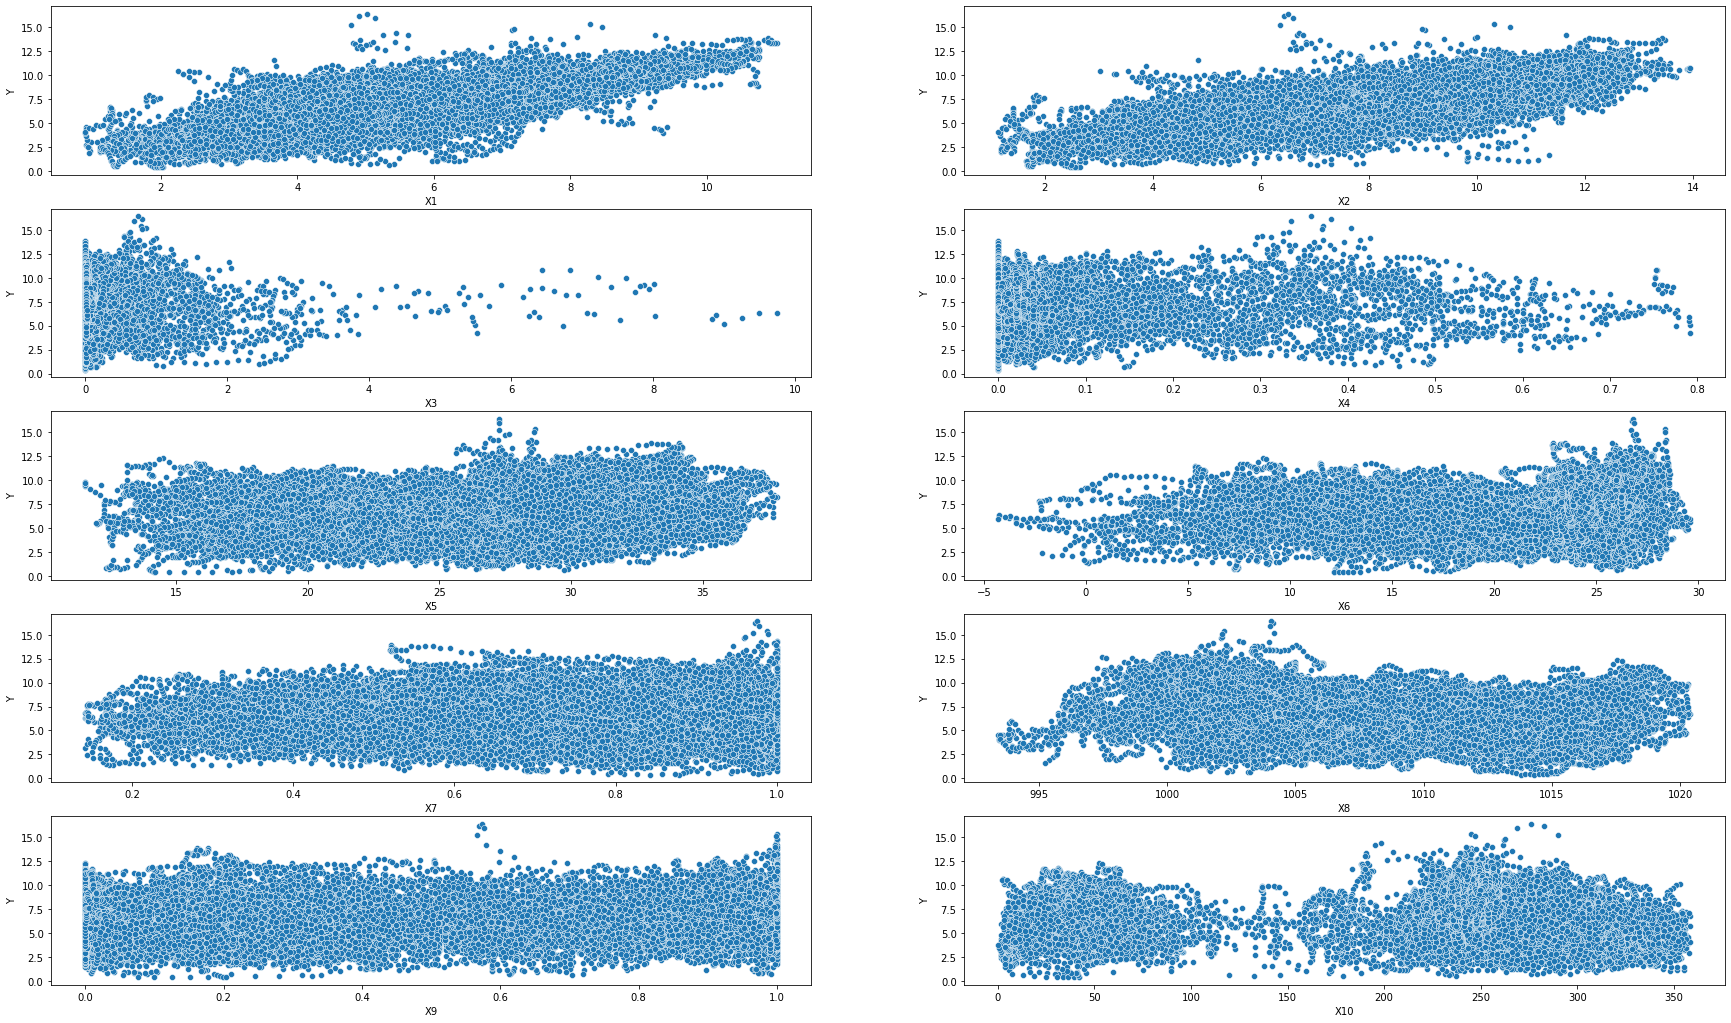

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(30, 18))
for i, col in enumerate(data.columns[:-1]):
    sns.scatterplot(data=data,x=col,y="Y",palette='hot',ax=axs.flatten()[i])

In [11]:
y = data['Y'].values

X = data.drop(columns = ['Y'])

# Scaling Data

In [12]:
std_scaler=StandardScaler()
rbst_scaler=RobustScaler()
power_transformer=PowerTransformer()
X_std=std_scaler.fit_transform(X)
X_rbst=rbst_scaler.fit_transform(X)
X_pwr=power_transformer.fit_transform(X)

# Split into train test 

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=89)
print('X_train Shape :',X_train.shape)
print('X_test Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test Shape :',y_test.shape)

X_train Shape : (27748, 10)
X_test Shape : (6937, 10)
y_train Shape : (27748,)
y_test Shape : (6937,)


In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR

In [18]:
regressors = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    SVR(),
    xgb.XGBRegressor(),
    lgb.LGBMRegressor()
    ]

name = []
train_acc = []
test_acc=[]
r2_value=[]
models = []
rmse = []
i = 0
for model in regressors:
    model.fit(X_train, y_train)   
    name.append(type(model).__name__)
    train_acc.append(100- (np.mean(np.abs((y_train - model.predict(X_train)) / y_train)) * 100))
    test_acc.append(100- (np.mean(np.abs((y_test - model.predict(X_test)) / y_test)) * 100))
    r2_value.append(metrics.r2_score(y_train, model.predict(X_train)))
    models.append(model)
    rmse.append(np.sqrt(mean_squared_error(model.predict(X_test), y_test)))

[07:27:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [19]:
df_score = pd.DataFrame(list(zip(name, train_acc, test_acc, r2_value, rmse, models)),columns=['name','train_acc','test_acc','R_Square','rmse',"model"])
df_score.set_index('name',inplace=True)
df_score.sort_values(by=['test_acc'],inplace=True)
df_score

,train_acc,test_acc,R_Square,rmse,model
name,,,,,
AdaBoostRegressor,76.137,76.145,0.549,1.443,"(DecisionTreeRegressor(max_depth=3, random_sta..."
XGBRegressor,82.613,82.606,0.704,1.189,XGBRegressor()
GradientBoostingRegressor,82.643,82.661,0.705,1.184,([DecisionTreeRegressor(criterion='friedman_ms...
SVR,83.973,83.915,0.726,1.135,SVR()
LGBMRegressor,86.605,85.861,0.822,0.972,LGBMRegressor()
DecisionTreeRegressor,100.000,91.555,1.000,0.832,DecisionTreeRegressor()
RandomForestRegressor,97.203,92.987,0.990,0.560,"(DecisionTreeRegressor(max_features='auto', ra..."


RandomForestRegressor()
R2 Value: 0.9895361209843145
Accuracy 92.93482614907266


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y,Predicted
0,1.564,0.995,-0.049,0.715,0.518,1.021,0.669,-1.294,1.668,0.354,10.802,9.000
1,0.552,1.325,-0.231,-0.383,-1.458,-1.032,-0.094,1.433,-0.901,-1.595,6.251,7.000
2,2.029,1.649,-0.231,-0.383,0.814,0.726,-0.031,-0.624,-0.691,0.231,10.858,11.000
3,-0.027,0.257,-0.231,-0.383,-0.431,-1.011,-0.935,0.800,0.193,-1.465,8.620,8.000
4,-0.323,0.524,-0.231,-0.383,-0.302,0.625,1.052,-0.385,-0.438,0.312,6.454,7.000


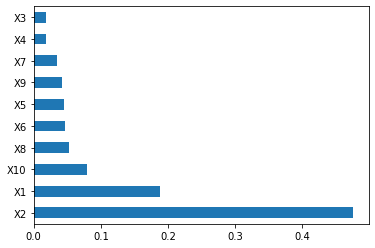

In [20]:
FinalModel = RandomForestRegressor()
# Printing all the parameters of Random Forest
print(FinalModel)

# Creating the model on Training Data
RF=FinalModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=X.columns)
TestingDataResults['Y']=y_test
TestingDataResults[('Predicted')]=np.round(prediction)
TestingDataResults.head()